In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mne

In [4]:
federico_test = mne.io.read_raw_ant("C:/Users/User/Documents/bachelorarbeit/data/EMG_ACC/PTB_measurement_14.04/Bonato_Federico_2025-04-14_13-02-56.cnt", preload=True)

Reading ANT file C:/Users/User/Documents/bachelorarbeit/data/EMG_ACC/PTB_measurement_14.04/Bonato_Federico_2025-04-14_13-02-56.cnt
Reading 0 ... 583854  =      0.000 ...   583.854 secs...


C:\Users\User\AppData\Local\Temp\ipykernel_4724\104471731.py:1: RuntimeWarning: All EEG channels are not referenced to the same electrode.
  federico_test = mne.io.read_raw_ant("C:/Users/User/Documents/bachelorarbeit/data/EMG_ACC/PTB_measurement_14.04/Bonato_Federico_2025-04-14_13-02-56.cnt", preload=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4724\104471731.py:1: RuntimeWarning: Unit unit not recognized, not scaling. Please report the unit on a github issue on https://github.com/mne-tools/mne-python.
  federico_test = mne.io.read_raw_ant("C:/Users/User/Documents/bachelorarbeit/data/EMG_ACC/PTB_measurement_14.04/Bonato_Federico_2025-04-14_13-02-56.cnt", preload=True)


In [22]:
channel_names  = ["BIP1", "BIP2", "BIP6", "BIP7", "BIP8"]
location = {"BIP7":"left forearm",
            "BIP8": "left delt",
            "BIP1" : "Charité ACC : y",
            "BIP2" : "Charité ACC : z",
            "BIP6" : "Charité ACC : x"}
data, times = federico_test[channel_names, :]
fed_test_df = pd.DataFrame(data.T, columns=channel_names)
fed_test_df["Time (s)"] = times

In [25]:
fed_test_df.head(5)

,BIP1,BIP2,BIP6,BIP7,BIP8,Time (s)
0,-1.726562,-2.054688,-0.40625,0.000000e+00,0.000000,0.000
1,-1.726562,-2.050781,-0.40625,-9.105469e-06,0.000008,0.001
2,-1.726562,-2.050781,-0.40625,-1.562500e-08,0.000004,0.002
3,-1.722656,-2.050781,-0.40625,5.703125e-06,0.000006,0.003
4,-1.722656,-2.050781,-0.40625,1.060156e-05,0.000005,0.004


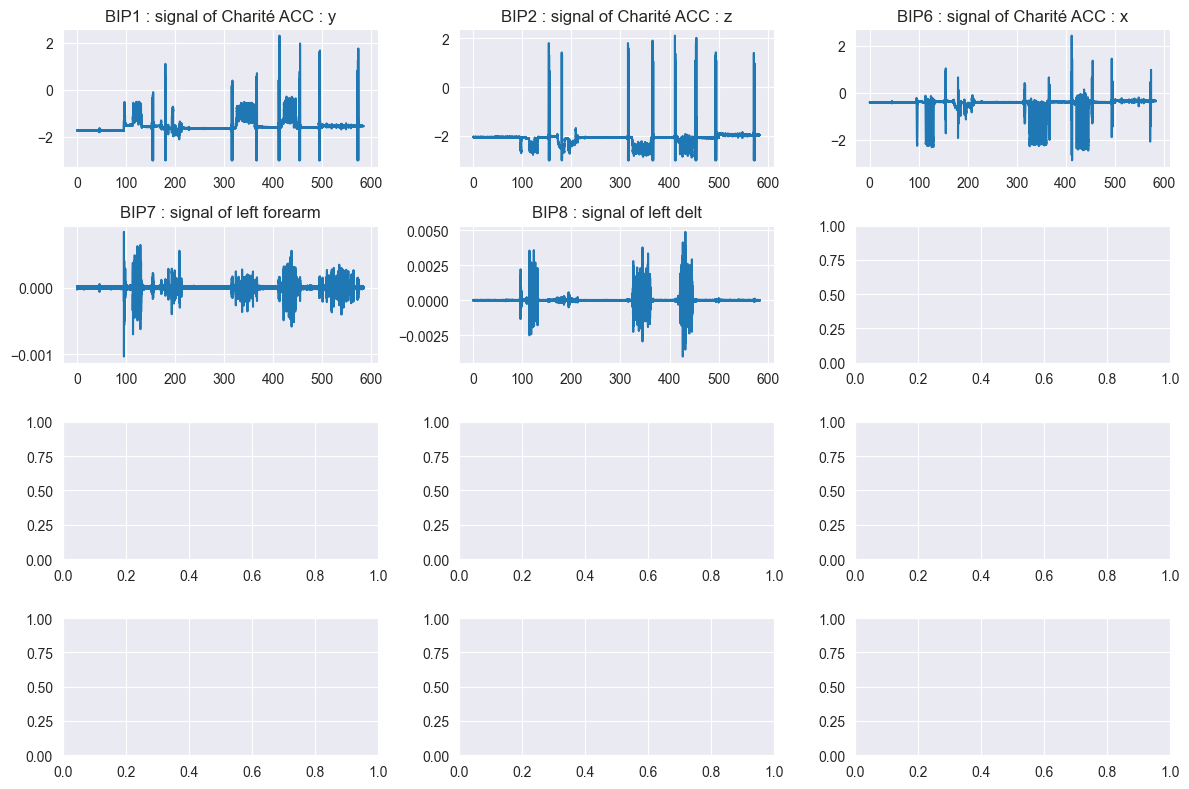

In [11]:
fig, axs = plt.subplots(4, 3, figsize=(12,8))
axs = axs.ravel()
for ax, channel in zip(axs, channel_names):
    ax.plot(times, fed_test_df[channel])
    ax.set_title(f"{channel} : signal of {location[channel]}")
plt.tight_layout()
plt.show()